### Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

# 1. Data Wrangling

## 1.1 Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from scipy.stats import pearsonr
sns.set()

In [2]:
data = pd.read_csv('C:/Users/HP/Python-Data-Analysis/Weather Data Analysis/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## 1.2 Data inspection

In [3]:
print('Number of rows    : {0}\n'.format(data.shape[0]))
print('Number of columns : {0}\n'.format(data.shape[1]))
print('Data Types        : {0}\n'.format(data.dtypes))
print('See if there are null values:{0}'.format(data.isna().sum()))

Number of rows    : 96453

Number of columns : 12

Data Types        : Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

See if there are null values:Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [4]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
cols_to_drop = ['Precip Type', 'Summary', 'Daily Summary']
data_cleaned = data.drop(columns = cols_to_drop, axis = 1)

In [6]:
data_cleaned

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,2016-09-09 20:00:00.000 +0200,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,2016-09-09 21:00:00.000 +0200,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,2016-09-09 22:00:00.000 +0200,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


## 1.3 Data Cleaning, Feature Engineering

In [7]:
from dateutil import parser

formatted_dates = []

for date_str in data_cleaned['Formatted Date']:
    if isinstance(date_str, str):
        parsed_date = parser.parse(date_str)
        formatted_dates.append(parsed_date)
    else:
        formatted_dates.append(date_str)

data_cleaned['Formatted Date'] = formatted_dates

# Convert to UTC timezone
data_cleaned['Formatted Date'] = pd.to_datetime(data_cleaned['Formatted Date'], utc=True)

In [8]:
data_cleaned.dtypes

Formatted Date              datetime64[ns, UTC]
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
dtype: object

In [9]:
data_cleaned['Date'] = data_cleaned['Formatted Date'].dt.date
data_cleaned['Time'] = data_cleaned['Formatted Date'].dt.time

In [10]:
data_cleaned.drop('Formatted Date', axis = 1, inplace = True)

In [11]:
data_cleaned.dtypes

Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Date                         object
Time                         object
dtype: object

In [12]:
cols = ['Date', 'Time', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
data_cleaned = data_cleaned[cols]
data_cleaned

,Date,Time,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-03-31,22:00:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-03-31,23:00:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01,00:00:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01,01:00:00,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01,02:00:00,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2016-09-09,17:00:00,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09,18:00:00,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09,19:00:00,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09,20:00:00,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


# 2. Exploratory Data Analysis

## 2.1 Summary statistics and Descriptive Analysis

In [13]:
data_cleaned.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


## 2.2 Data Visulaization

Text(0.5, 0, 'Pressure (millibars)')

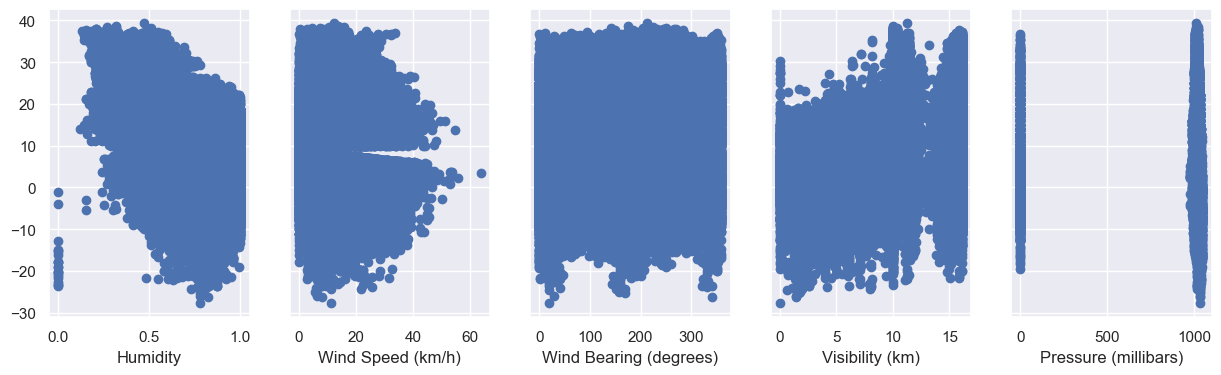

In [14]:
fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(1, 5, sharey=True, figsize=(15, 4))

ax1.scatter(data_cleaned['Humidity'],data_cleaned['Apparent Temperature (C)'])
ax1.set_xlabel('Humidity')
ax2.scatter(data_cleaned['Wind Speed (km/h)'],data_cleaned['Apparent Temperature (C)'])
ax2.set_xlabel('Wind Speed (km/h)')
ax3.scatter(data_cleaned['Wind Bearing (degrees)'],data_cleaned['Apparent Temperature (C)'])
ax3.set_xlabel('Wind Bearing (degrees)')
ax4.scatter(data_cleaned['Visibility (km)'],data_cleaned['Apparent Temperature (C)'])
ax4.set_xlabel('Visibility (km)')
ax5.scatter(data_cleaned['Pressure (millibars)'],data_cleaned['Apparent Temperature (C)'])
ax5.set_xlabel('Pressure (millibars)')

Is there correlation between Temperature and Humidity?

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

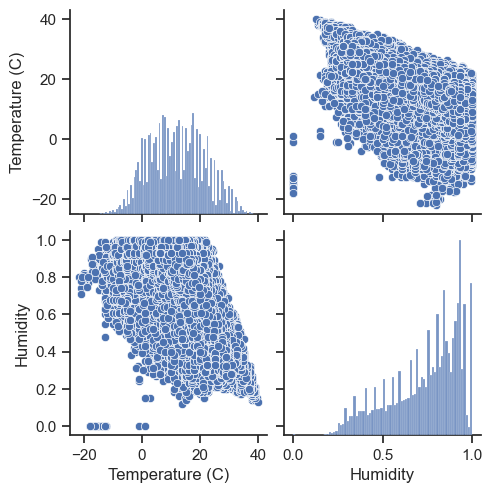

In [15]:
# Set the style and context of the plots
sns.set(style="ticks")
sns.set_context("notebook", font_scale= 1)

# Create a pair plot with increased size
plt.figure(figsize=(20, 8))
sns.pairplot(data_cleaned[['Temperature (C)', 'Humidity']])

# Display the plot
plt.show()


In [16]:
correlation = data_cleaned['Temperature (C)'].corr(data_cleaned['Humidity'])
correlation

-0.6322546750278023

The correlation between the Temperature and Humidity suggests that there is negative correlation between the two as one increases, the other decreases

Is there any collinearity between Appearent temperature and Humidity?

In [17]:
correlation = data_cleaned['Apparent Temperature (C)'].corr(data_cleaned['Humidity'])
correlation

-0.6025709955733898

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

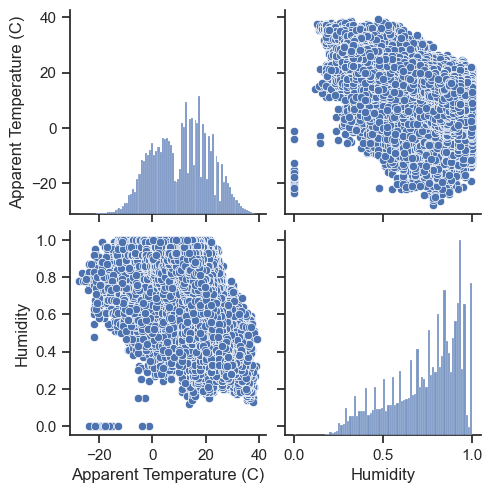

In [18]:
# Set the style and context of the plots
sns.set(style="ticks")
sns.set_context("notebook", font_scale= 1)

# Create a pair plot with increased size
plt.figure(figsize=(20, 8))
sns.pairplot(data_cleaned[['Apparent Temperature (C)', 'Humidity']])

# Display the plot
plt.show()

 A correlation value of -0.602570996 indicates a moderately strong negative correlation between the 'Apparent Temperature (C)' and 'Humidity' variables.

## 2.3 Outlier detection

In [19]:
data_cleaned = data_cleaned[data_cleaned['Apparent Temperature (C)'].notna() & np.isfinite(data_cleaned['Apparent Temperature (C)'])]

C:\Users\HP\AppData\Local\Temp\ipykernel_5700\1093511434.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Apparent Temperature (C)'])


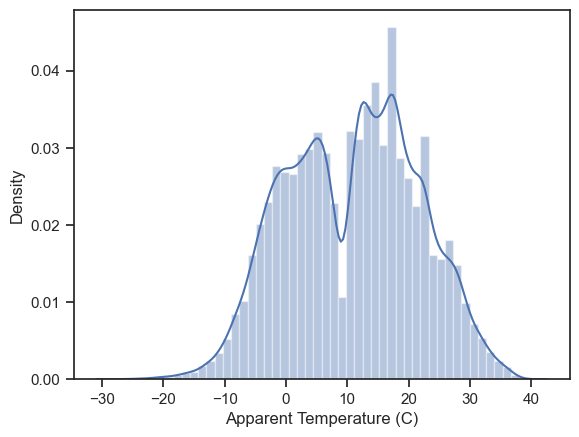

In [21]:
sns.distplot(data_cleaned['Apparent Temperature (C)'])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5700\1572864895.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Humidity'])


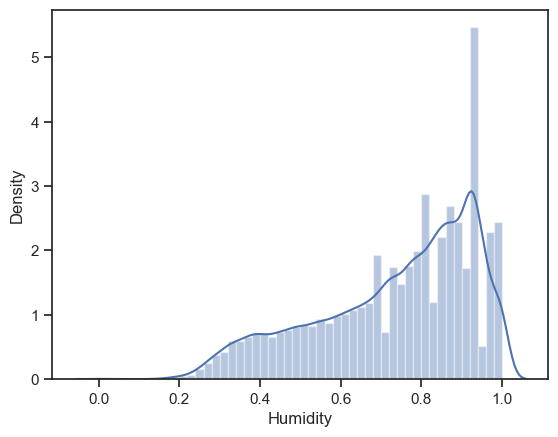

In [22]:
sns.distplot(data_cleaned['Humidity'])
plt.show()

In [23]:
data_cleaned.columns.values

array(['Date', 'Time', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)'], dtype=object)

C:\Users\HP\AppData\Local\Temp\ipykernel_5700\3487025599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Wind Speed (km/h)'])


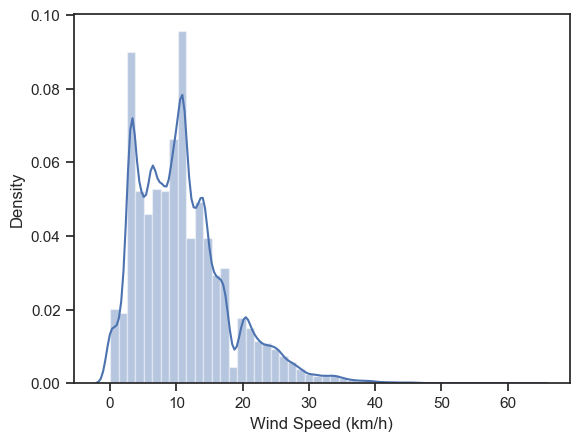

In [24]:
sns.distplot(data_cleaned['Wind Speed (km/h)'])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5700\2262581915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Wind Bearing (degrees)'])


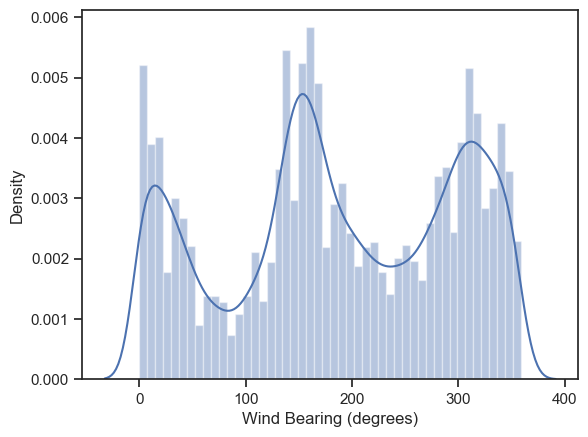

In [25]:
sns.distplot(data_cleaned['Wind Bearing (degrees)'])
plt.show()

## 2.4 Checking for multicollinearity

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

columns_for_vif = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
X = data_cleaned[columns_for_vif]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 Variable        VIF
0                Humidity  13.876773
1       Wind Speed (km/h)   3.446279
2  Wind Bearing (degrees)   4.037040
3         Visibility (km)   7.386801
4    Pressure (millibars)  26.870380


In [29]:
data_cleaned.drop('Pressure (millibars)', axis = 1, inplace = True)

In [30]:
columns_for_vif = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)']
X = data_cleaned[columns_for_vif]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 Variable       VIF
0                Humidity  5.119088
1       Wind Speed (km/h)  3.206546
2  Wind Bearing (degrees)  3.935079
3         Visibility (km)  4.863813


# 3. Model Building and Evaluation

## 3.1 Data Splitting

In [38]:
# Temperature (C)	Apparent Temperature (C)	Humidity	Wind Speed (km/h)	Wind Bearing (degrees)	Visibility (km)	Pressure (millibars)
cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Date', 'Time']
features = data_cleaned.drop( columns = cols, axis = 1 )
target = data_cleaned[['Apparent Temperature (C)']]

## 3.2 Features Scaling

In [42]:
scaler = StandardScaler()
scaler.fit(features)
result = scaler.transform(features)
scaled_df = pd.DataFrame(result, columns=features.columns)

## 3.3 Feature Selection

In [47]:
# Perform feature selection
f_value, p_value = f_regression(scaled_df, target)
significance_level = 0.05
selected_features = scaled_df.columns[p_value < significance_level]

# Select the scaled features based on the feature selection
selected_features = scaled_df[selected_features]
selected_features

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km)
0,0.793470,0.478635,0.591256,1.306976
1,0.639996,0.499594,0.665756,1.306976
2,0.793470,-0.995473,0.153570,1.099586
3,0.486521,0.476306,0.758881,1.306976
4,0.486521,0.033841,0.665756,1.306976
...,...,...,...,...
96448,-1.559811,0.026855,-1.457488,1.372265
96449,-1.304020,-0.103556,-1.559925,1.241686
96450,-0.894753,-0.264241,-1.466800,1.372265
96451,-0.690120,-0.040680,-1.559925,1.372265


## 3.4 Splitting into training and testing data

In [66]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

## 3.5 Model Training

In [51]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_hat = reg.predict(X_train)

Text(0.5, 0, 'Target Temperature')

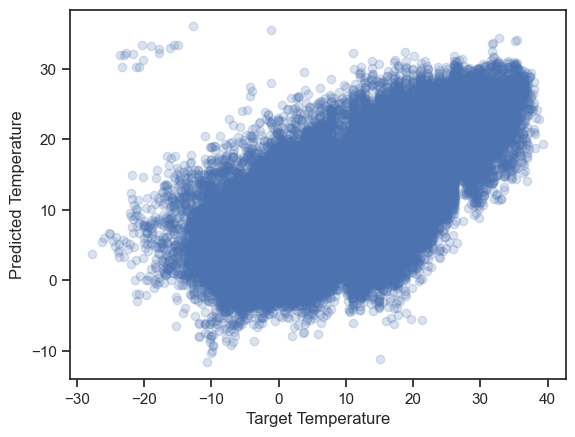

In [52]:
plt.scatter(y_train, y_hat, alpha = 0.2)
plt.ylabel('Predicted Temperature')
plt.xlabel('Target Temperature')

<Axes: ylabel='Density'>

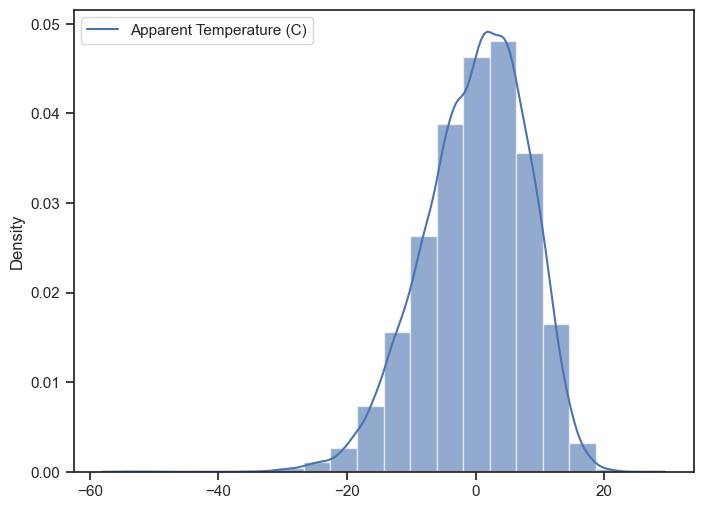

In [53]:
# Residual Plot = Difference between target and prediction
residuals = y_train - y_hat

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Create a histogram of residuals
plt.hist(residuals, bins=20, density=True, alpha=0.6, label='Histogram')

# Add a kernel density estimate (KDE) line plot
sns.kdeplot(residuals, color='green', label='KDE')

## 3.6 Model Testing

In [82]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

Text(0.5, 0, 'Target Prices')

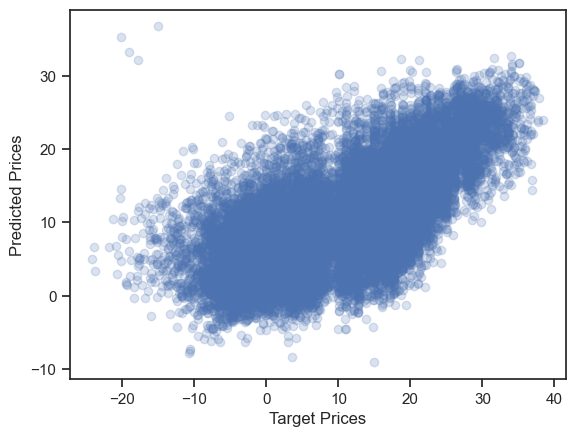

In [83]:
plt.scatter(y_test, y_hat, alpha = 0.2)
plt.ylabel('Predicted Prices')
plt.xlabel('Target Prices')

In [84]:
predict_value = pd.DataFrame(y_hat, columns = ['Predicted_Temperature'])
predict_value['Target'] = y_test
predict_value

,Predicted_Temperature,Target
0,19.491597,NaN
1,6.320511,NaN
2,12.972801,NaN
3,4.873342,NaN
4,7.567806,NaN
...,...,...
19286,9.999422,12.266667
19287,17.327030,NaN
19288,17.590626,NaN
19289,16.103776,NaN


In [85]:
y_test = y_test.reset_index(drop = True)
predict_value.drop('Target', axis = 1, inplace = True)
predict_value['Target'] = y_test
predict_value

,Predicted_Temperature,Target
0,19.491597,28.827778
1,6.320511,7.988889
2,12.972801,14.400000
3,4.873342,-2.722222
4,7.567806,-2.672222
...,...,...
19286,9.999422,7.077778
19287,17.327030,17.894444
19288,17.590626,10.716667
19289,16.103776,24.888889


In [86]:
predict_value['Residual'] =  predict_value['Target'] - predict_value['Predicted_Temperature'] 
predict_value

,Predicted_Temperature,Target,Residual
0,19.491597,28.827778,9.336181
1,6.320511,7.988889,1.668378
2,12.972801,14.400000,1.427199
3,4.873342,-2.722222,-7.595564
4,7.567806,-2.672222,-10.240029
...,...,...,...
19286,9.999422,7.077778,-2.921644
19287,17.327030,17.894444,0.567414
19288,17.590626,10.716667,-6.873959
19289,16.103776,24.888889,8.785113


In [87]:
predict_value['Difference%'] = np.absolute(predict_value['Residual']/predict_value['Target']* 100)
predict_value

,Predicted_Temperature,Target,Residual,Difference%
0,19.491597,28.827778,9.336181,32.386058
1,6.320511,7.988889,1.668378,20.883729
2,12.972801,14.400000,1.427199,9.911102
3,4.873342,-2.722222,-7.595564,279.020735
4,7.567806,-2.672222,-10.240029,383.202735
...,...,...,...,...
19286,9.999422,7.077778,-2.921644,41.279111
19287,17.327030,17.894444,0.567414,3.170896
19288,17.590626,10.716667,-6.873959,64.142695
19289,16.103776,24.888889,8.785113,35.297327


In [88]:
predict_value.sort_values(by = 'Difference%')

,Predicted_Temperature,Target,Residual,Difference%
3965,5.344847,5.344444,-0.000403,0.007532
10581,12.204066,12.205556,0.001489,0.012203
15950,26.005988,26.000000,-0.005988,0.023030
10292,20.153211,20.161111,0.007900,0.039183
12092,22.253249,22.244444,-0.008804,0.039580
...,...,...,...,...
14002,5.694018,0.000000,-5.694018,inf
17316,4.624262,0.000000,-4.624262,inf
5327,0.633967,0.000000,-0.633967,inf
2934,3.671176,0.000000,-3.671176,inf


Text(0.5, 0, 'Target Temperature')

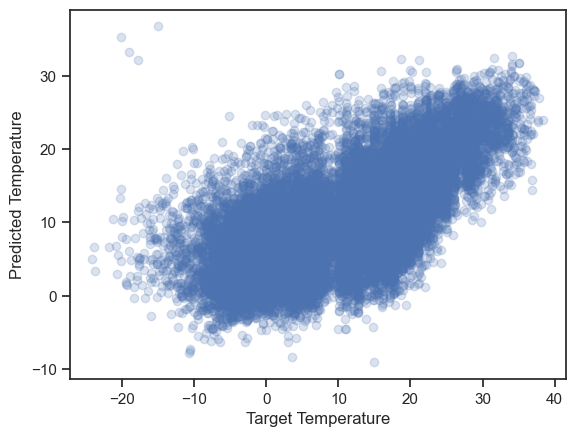

In [89]:
plt.scatter(predict_value['Target'], predict_value['Predicted_Temperature'], alpha = 0.2)
plt.ylabel('Predicted Temperature')
plt.xlabel('Target Temperature')

# Model just based on Humidity

In [67]:
x_train = X_train[['Humidity']]
x_test = X_test[['Humidity']]

In [68]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_hat = reg.predict(x_train)

Text(0.5, 0, 'Target Temperature')

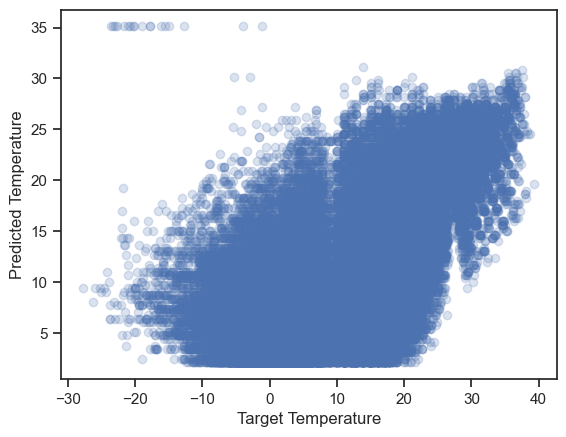

In [71]:
plt.scatter(y_train, y_hat, alpha = 0.2)
plt.ylabel('Predicted Temperature')
plt.xlabel('Target Temperature')

<Axes: ylabel='Density'>

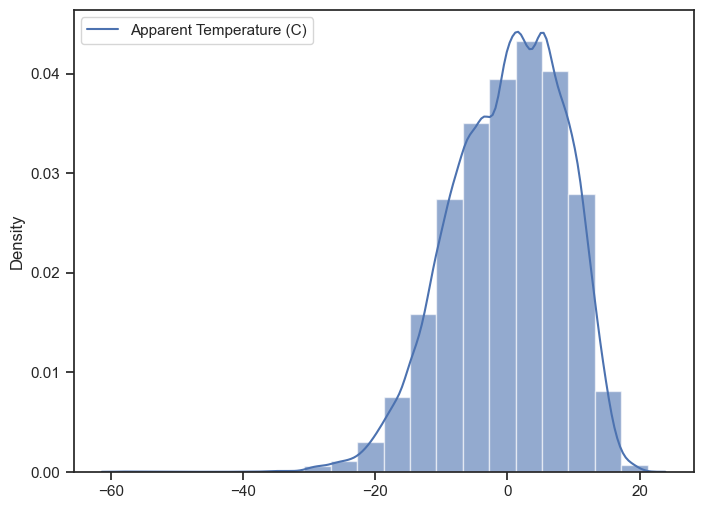

In [72]:
# Residual Plot = Difference between target and prediction
residuals = y_train - y_hat

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Create a histogram of residuals
plt.hist(residuals, bins=20, density=True, alpha=0.6, label='Histogram')

# Add a kernel density estimate (KDE) line plot
sns.kdeplot(residuals, color='green', label='KDE')

In [81]:
reg.fit(x_train, y_train)
y_hat = reg.predict(x_test)

Text(0.5, 0, 'Target Temperature')

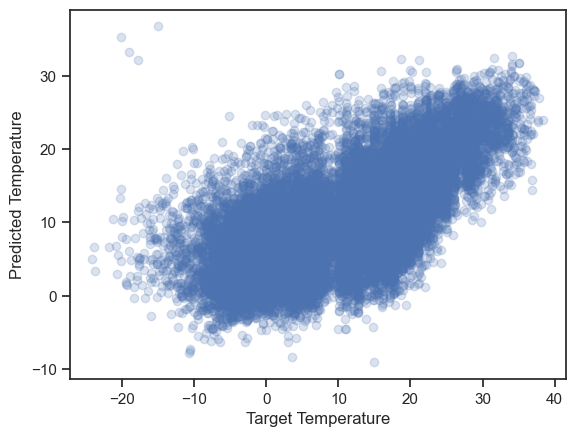

In [90]:
plt.scatter(y_test, y_hat, alpha = 0.2)
plt.ylabel('Predicted Temperature')
plt.xlabel('Target Temperature')

In [91]:
predict_value = pd.DataFrame(y_hat, columns = ['Predicted_Temperature'])
predict_value['Target'] = y_test
predict_value

,Predicted_Temperature,Target
0,19.491597,28.827778
1,6.320511,7.988889
2,12.972801,14.400000
3,4.873342,-2.722222
4,7.567806,-2.672222
...,...,...
19286,9.999422,7.077778
19287,17.327030,17.894444
19288,17.590626,10.716667
19289,16.103776,24.888889


In [92]:
y_test = y_test.reset_index(drop = True)
predict_value.drop('Target', axis = 1, inplace = True)
predict_value['Target'] = y_test
predict_value

,Predicted_Temperature,Target
0,19.491597,28.827778
1,6.320511,7.988889
2,12.972801,14.400000
3,4.873342,-2.722222
4,7.567806,-2.672222
...,...,...
19286,9.999422,7.077778
19287,17.327030,17.894444
19288,17.590626,10.716667
19289,16.103776,24.888889


In [93]:
predict_value['Residual'] =  predict_value['Target'] - predict_value['Predicted_Temperature'] 
predict_value

,Predicted_Temperature,Target,Residual
0,19.491597,28.827778,9.336181
1,6.320511,7.988889,1.668378
2,12.972801,14.400000,1.427199
3,4.873342,-2.722222,-7.595564
4,7.567806,-2.672222,-10.240029
...,...,...,...
19286,9.999422,7.077778,-2.921644
19287,17.327030,17.894444,0.567414
19288,17.590626,10.716667,-6.873959
19289,16.103776,24.888889,8.785113


In [94]:
predict_value['Difference%'] = np.absolute(predict_value['Residual']/predict_value['Target']* 100)
predict_value

,Predicted_Temperature,Target,Residual,Difference%
0,19.491597,28.827778,9.336181,32.386058
1,6.320511,7.988889,1.668378,20.883729
2,12.972801,14.400000,1.427199,9.911102
3,4.873342,-2.722222,-7.595564,279.020735
4,7.567806,-2.672222,-10.240029,383.202735
...,...,...,...,...
19286,9.999422,7.077778,-2.921644,41.279111
19287,17.327030,17.894444,0.567414,3.170896
19288,17.590626,10.716667,-6.873959,64.142695
19289,16.103776,24.888889,8.785113,35.297327


In [95]:
predict_value.sort_values(by = 'Difference%')

,Predicted_Temperature,Target,Residual,Difference%
3965,5.344847,5.344444,-0.000403,0.007532
10581,12.204066,12.205556,0.001489,0.012203
15950,26.005988,26.000000,-0.005988,0.023030
10292,20.153211,20.161111,0.007900,0.039183
12092,22.253249,22.244444,-0.008804,0.039580
...,...,...,...,...
14002,5.694018,0.000000,-5.694018,inf
17316,4.624262,0.000000,-4.624262,inf
5327,0.633967,0.000000,-0.633967,inf
2934,3.671176,0.000000,-3.671176,inf


Text(0.5, 0, 'Target Temperature')

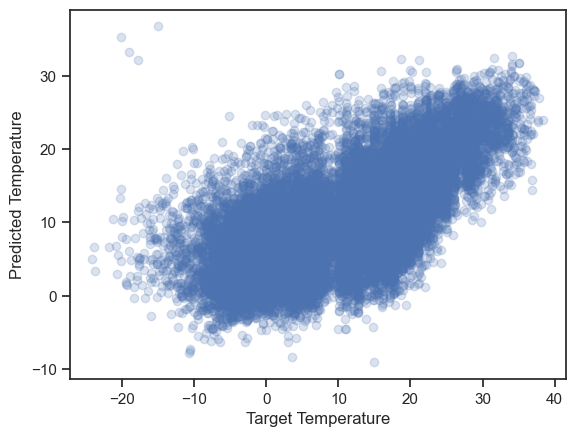

In [96]:
plt.scatter(predict_value['Target'], predict_value['Predicted_Temperature'], alpha = 0.2)
plt.ylabel('Predicted Temperature')
plt.xlabel('Target Temperature')